In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("../Data/retail_sales.csv",parse_dates=["date"],index_col="date")

In [10]:
df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


#### Checking the datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2009-10-01 to 2015-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


#### Checking if there is any null value 

In [12]:
df.isna().sum()

sales    0
dtype: int64

#### Checking duplicate rows 

In [13]:
df[df.duplicated()].shape

(0, 1)

#### Check if there are outliers

<AxesSubplot:>

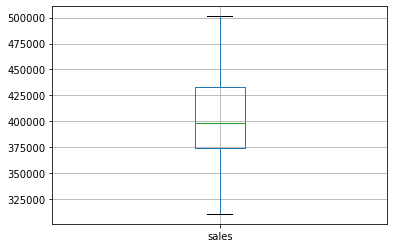

In [14]:
df.boxplot()

<AxesSubplot:xlabel='date'>

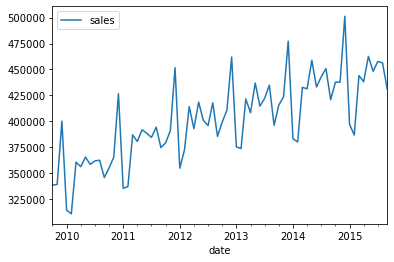

In [15]:
df.plot()

#### Checking  if data is stationary
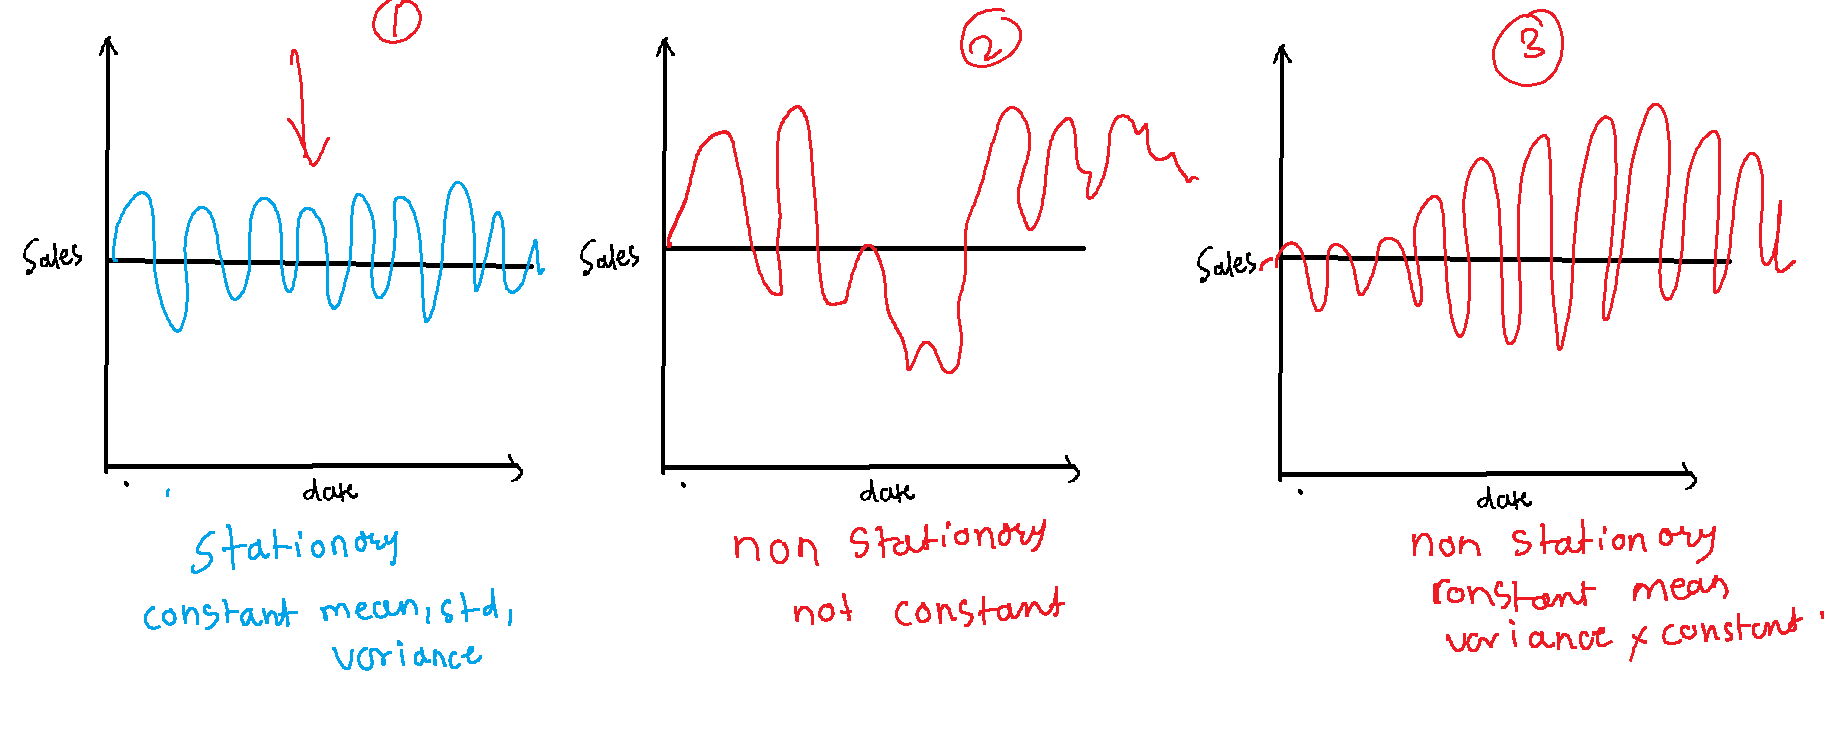

### Argumented Dickey Fuller Test

Assumption: Observations are temporally ordered

##### Interpretation

Null Hypothesis (H0): Series is not Stationary<br>
Alternate Hypothesis (H1): Series is Stationary


#### Result 
we interpret the result with p-value from the test 
p-value is below  threshold then we reject null hypothesis else we accept the H0 

p-val>0.05 Failed to reject the null hypothesis ie. time series is not stationaty<br>
p-val<=0.05 Reject the null hypothesis ie, time series is stationary

In [17]:
from statsmodels.tsa.stattools import adfuller 
res=adfuller(df.sales)
p_val=res[1]
if p_val>0.05 :
    print("Not Stationary")
else:
    print("Stationary")

Stationary


In [18]:
res

(-4.344562938177351,
 0.00037156992996919,
 11,
 60,
 {'1%': -3.5443688564814813,
  '5%': -2.9110731481481484,
  '10%': -2.5931902777777776},
 1215.3997421199313)

### Time Series Decomposition

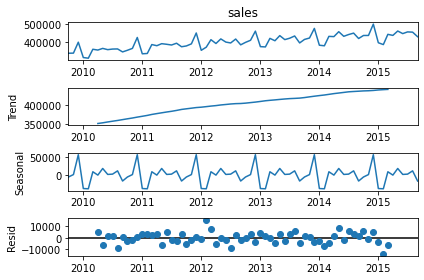

In [23]:
from statsmodels.api import tsa
decomp=tsa.seasonal_decompose(df.sales)
fig=decomp.plot()

#### Differencing

1) y(t) - y(t-1)

In [27]:
df["sales1"]=df["sales"]-df["sales"].shift(1)

<AxesSubplot:xlabel='date'>

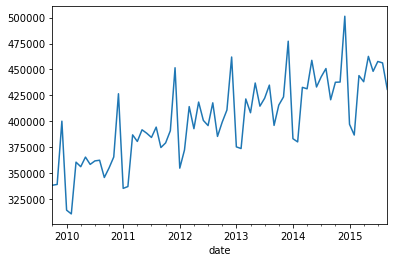

In [28]:
df["sales"].plot()

<AxesSubplot:xlabel='date'>

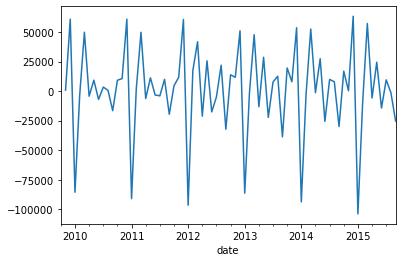

In [29]:
df["sales1"].plot()

<AxesSubplot:xlabel='date'>

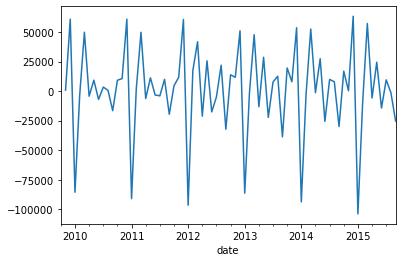

In [30]:
df["sales"].diff().plot()

#### Seasonal Differencing 

2) y(t) - y(t-n)

<AxesSubplot:xlabel='date'>

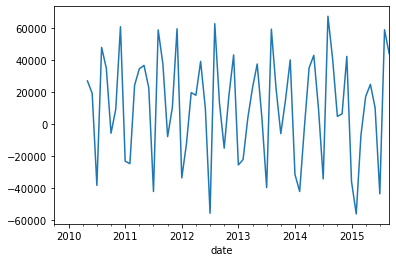

In [31]:
n=7
df["sales7"]=df['sales']-df["sales"].shift(7)
df["sales7"].plot()

#### Transformation 




<AxesSubplot:xlabel='date'>

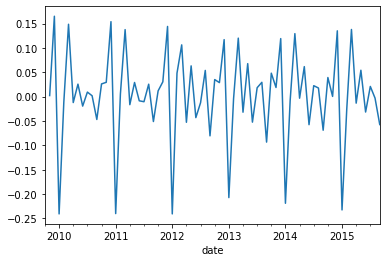

In [33]:
df["sales_log"]=np.log(df.sales)
df["sales_log_diff"]=df["sales_log"]-df["sales_log"].shift(1)
df["sales_log_diff"].plot()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

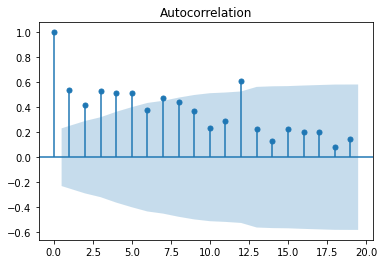

In [37]:
fig=plot_acf(df.sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


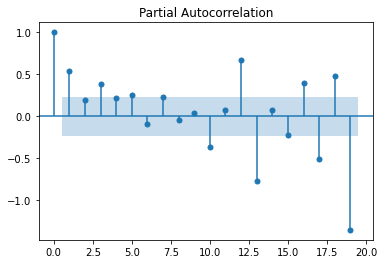

In [38]:
fig=plot_pacf(df.sales)